Saving train.csv to train (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


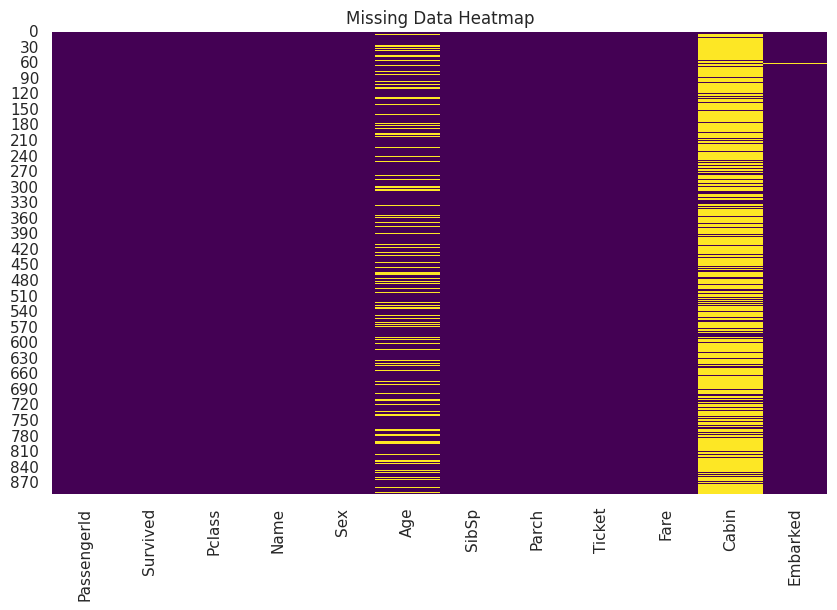

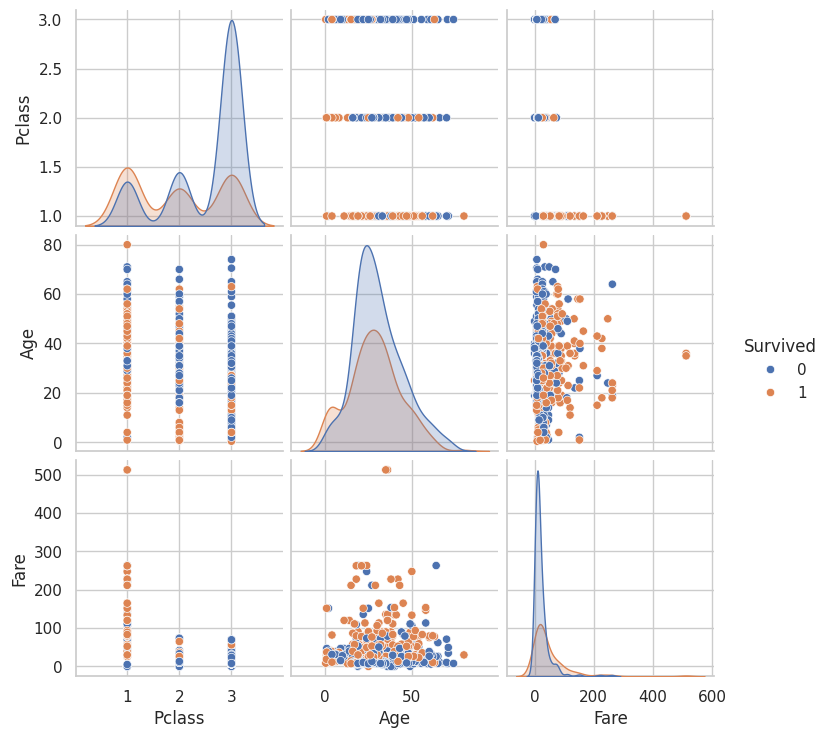

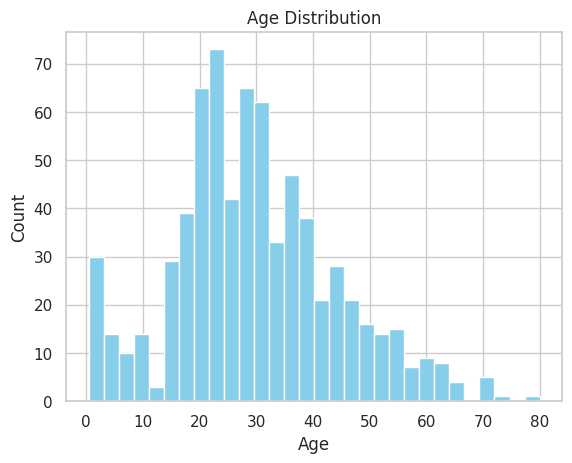

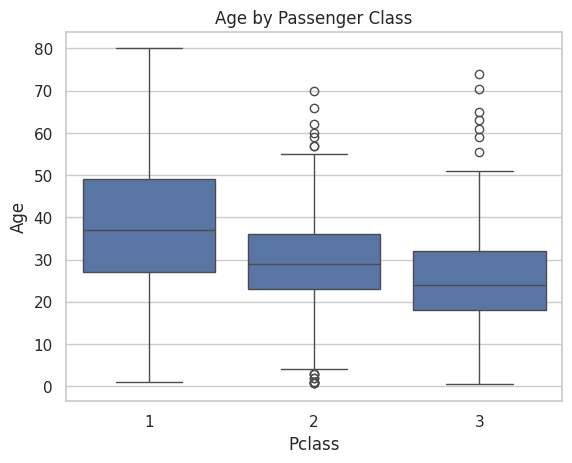

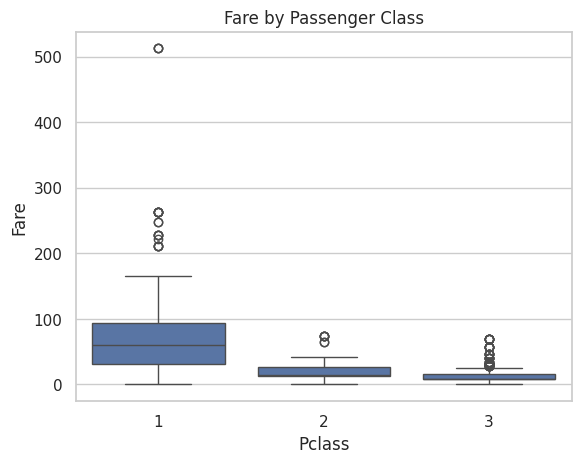

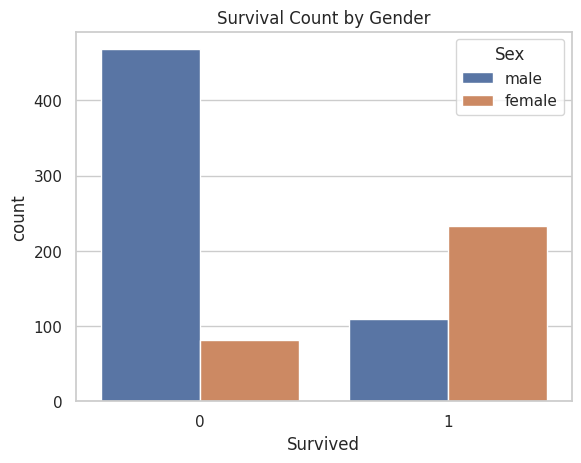


## Summary of Findings
- **Data Quality Issues**: Significant missing data in `Age`, `Cabin`, and some in `Embarked` need cleaning.
- **Survival Correlates**: Gender and Passenger Class have strong relationships with survival outcomes. Females and 1st class passengers survived more.
- **Age Trends**: Younger passengers were mostly in 3rd class. Age has right-skewed distribution, impacting modeling.
- **Fare Patterns**: Fare shows strong skew and varies significantly by class, indicating socioeconomic differences.
- **Next Steps**: Impute or drop missing values, encode categorical variables, and use these insights for building predictive models.



In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

# Upload and read Titanic CSV
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("train.csv")
df.head()

# Check data structure and stats
df.info()
df.describe()
df.isnull().sum()

# View category counts
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Embarked'].value_counts())

# Visualize missing data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Pairplot for key numeric features
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()

# Histogram of Age
df['Age'].hist(bins=30, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Boxplot: Age by Class
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age by Passenger Class")
plt.show()

# Boxplot: Fare by Class
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare by Passenger Class")
plt.show()

# Survival count by Gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival Count by Gender")
plt.show()

# Observations (edit this Markdown cell in Colab)
from IPython.display import Markdown

Markdown("""
### Observations
- **Missing Data**: The heatmap shows substantial missing values in the `Age` and `Cabin` columns. `Age` has about 20% missing, while `Cabin` is missing for most passengers.
- **Passenger Class Distribution**: Majority of passengers are in 3rd class (Pclass 3). Class imbalance is evident.
- **Gender Distribution**: More male passengers than female. Value counts confirm ~577 males, 314 females.
- **Survival by Gender**: The barplot indicates females had significantly higher survival rates compared to males.
- **Age Distribution**: Right-skewed. Most passengers are in their 20s and 30s, with very few older passengers.
- **Age vs Pclass**: Boxplots show that 1st class passengers are generally older, while 3rd class passengers tend to be younger.
- **Fare Distribution**: Strong right-skew with some extreme outliers in 1st class. Higher Pclass correlates with higher fare.
- **Fare vs Pclass**: 1st class fares are much higher than 2nd or 3rd class fares.
- **Pairplot**: Clear trends that survival is related to gender, age, fare, and passenger class.
- **Embarked**: Most passengers embarked from 'S', followed by 'C' and 'Q'.
""")

from IPython.display import Markdown

Markdown("""
## Summary of Findings
- **Data Quality Issues**: Significant missing data in `Age`, `Cabin`, and some in `Embarked` need cleaning.
- **Survival Correlates**: Gender and Passenger Class have strong relationships with survival outcomes. Females and 1st class passengers survived more.
- **Age Trends**: Younger passengers were mostly in 3rd class. Age has right-skewed distribution, impacting modeling.
- **Fare Patterns**: Fare shows strong skew and varies significantly by class, indicating socioeconomic differences.
- **Next Steps**: Impute or drop missing values, encode categorical variables, and use these insights for building predictive models.

""")

